In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    df = pd.read_csv("cleaned_week1_CSV.csv")
except FileNotFoundError:
    print("Error: 'cleaned_week1_CSV.csv' not found.  Please make sure the file is in the same directory as the script, or provide the correct file path.")
    exit()
except pd.errors.ParserError:
    print("Error: Could not parse 'cleaned_week1_CSV.csv'.  The file may be corrupt or have an incorrect format.")
    exit()

In [ ]:
def convert_to_datetime(dt_str):
    try:
        return pd.to_datetime(dt_str)
    except (ValueError, TypeError):
        return pd.NaT  

df['Learner SignUp DateTime'] = df['Learner SignUp DateTime'].apply(convert_to_datetime)

In [ ]:
for col in ["Apply Date", "Opportunity End Date", "Opportunity Start Date"]:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(r'^(\d{2}/\d{2}/\d{4})\s\d+:', r'\1 ', regex=True)  
    df[col] = df[col].str.replace('Not Available', '')         
    df[col] = df[col].apply(convert_to_datetime)                  

C:\Users\leewa\AppData\Local\Temp\ipykernel_3452\3326367977.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(dt_str)


In [ ]:
df.dropna(subset=['Learner SignUp DateTime'], inplace=True)


df['SignUp Month'] = df['Learner SignUp DateTime'].dt.month
df['SignUp Year'] = df['Learner SignUp DateTime'].dt.year
df['SignUp Month-Year'] = df['Learner SignUp DateTime'].dt.to_period('M')

In [7]:
status_counts = df['Status Code'].value_counts()

expected_status = [1080, 1070, 1040, 1110, 1120, 1050, 1010, 1030] 
for stat in expected_status:
    if stat not in status_counts.index:
       
        status_counts[stat] = 0 
print(status_counts)
print(df.dtypes) 

Status Code
1030    3443
1070    3162
1080     748
1050     596
1010     103
1040      97
1110      85
1120      29
Name: count, dtype: int64
Learner SignUp DateTime    datetime64[ns]
Opportunity Id                     object
Opportunity Name                   object
Opportunity Category               object
Opportunity End Date       datetime64[ns]
First Name                         object
Date of Birth                      object
Gender                             object
Country                            object
Institution Name                   object
Current/Intended Major             object
Entry created at                   object
Status Description                 object
Status Code                         int64
Apply Date                 datetime64[ns]
Opportunity Start Date     datetime64[ns]
SignUp Month                        int32
SignUp Year                         int32
SignUp Month-Year               period[M]
dtype: object


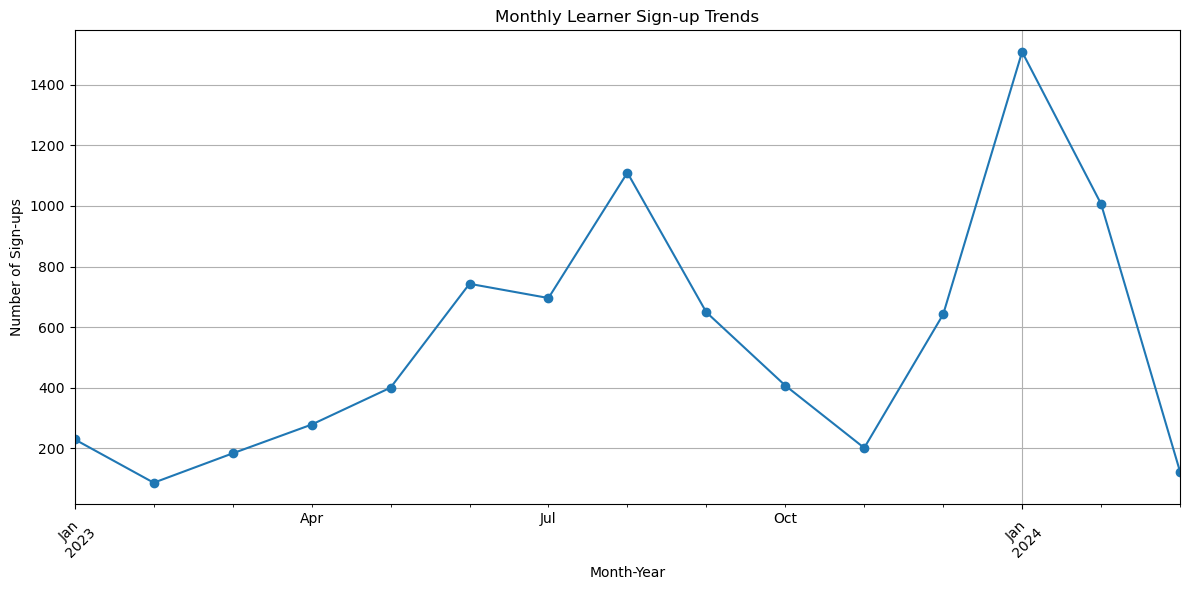

In [ ]:
monthly_signups = df.groupby('SignUp Month-Year')['Learner SignUp DateTime'].count()
plt.figure(figsize=(12, 6))  
monthly_signups.plot(kind='line', marker='o') 
plt.title('Monthly Learner Sign-up Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Sign-ups')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

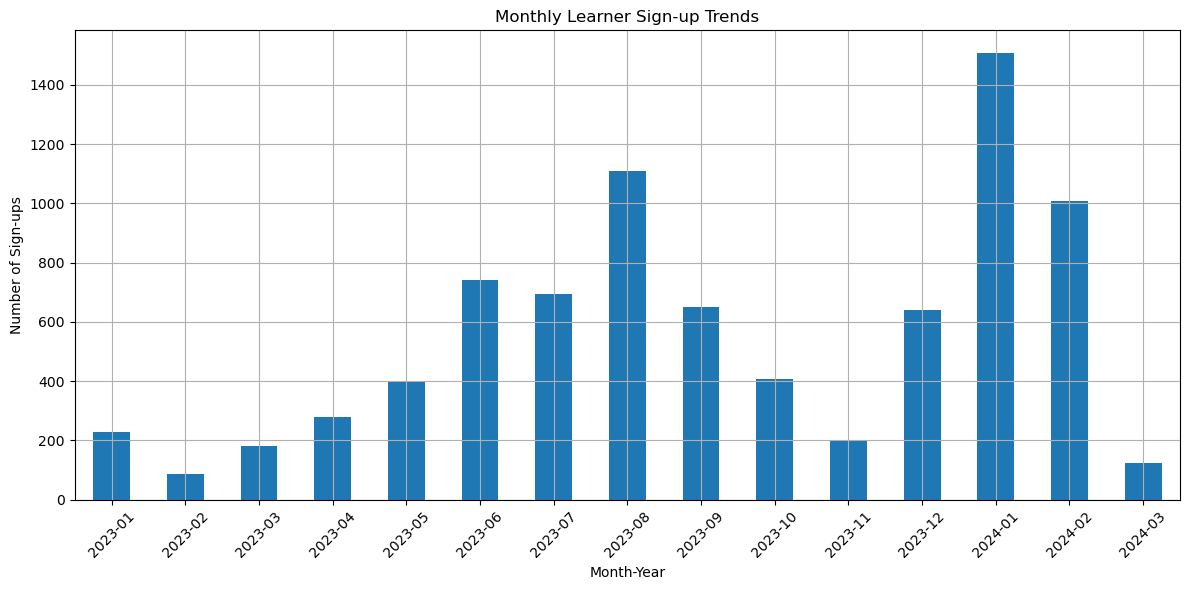

In [9]:
plt.figure(figsize=(12, 6))
monthly_signups.plot(kind='bar') 
plt.title('Monthly Learner Sign-up Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Sign-ups')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

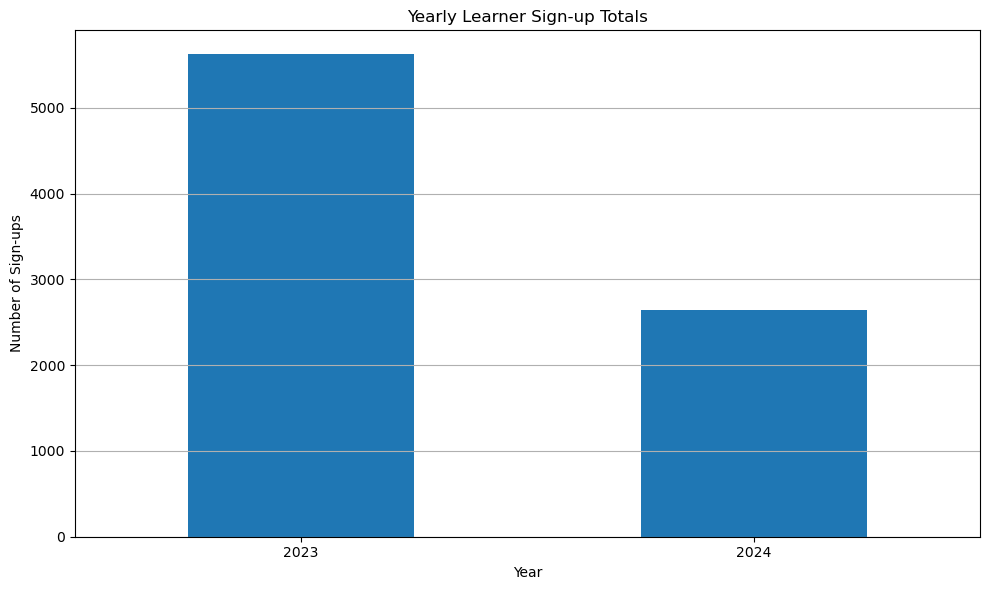

In [ ]:
yearly_signups = df.groupby('SignUp Year')['Learner SignUp DateTime'].count()
plt.figure(figsize=(10, 6))
yearly_signups.plot(kind='bar')
plt.title('Yearly Learner Sign-up Totals')
plt.xlabel('Year')
plt.ylabel('Number of Sign-ups')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

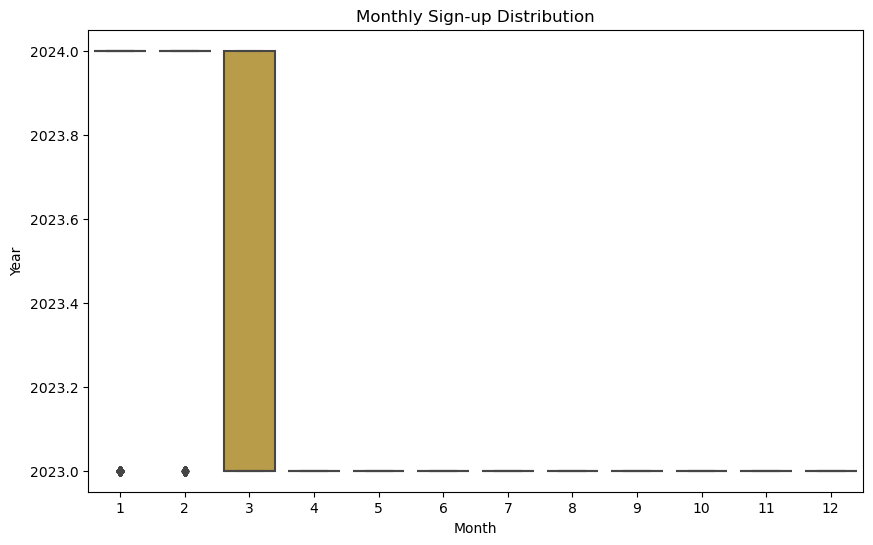

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SignUp Month', y='SignUp Year', data=df)
plt.title('Monthly Sign-up Distribution')
plt.xlabel('Month')
plt.ylabel('Year') #Year of each month
plt.show()

In [13]:
print("\n--- Report Summary ---")

print("\nMonthly Sign-up Counts:")
print(monthly_signups)

print("\nYearly Sign-up Counts:")
print(yearly_signups)

most_popular_month = monthly_signups.idxmax()
signups_in_most_popular_month = monthly_signups.max()

print(f"\nMost Popular Sign-up Month: {most_popular_month} with {signups_in_most_popular_month} sign-ups.")


--- Report Summary ---

Monthly Sign-up Counts:
SignUp Month-Year
2023-01     229
2023-02      86
2023-03     183
2023-04     278
2023-05     400
2023-06     743
2023-07     696
2023-08    1110
2023-09     649
2023-10     407
2023-11     201
2023-12     642
2024-01    1509
2024-02    1007
2024-03     123
Freq: M, Name: Learner SignUp DateTime, dtype: int64

Yearly Sign-up Counts:
SignUp Year
2023    5624
2024    2639
Name: Learner SignUp DateTime, dtype: int64

Most Popular Sign-up Month: 2024-01 with 1509 sign-ups.


In [14]:
exclude_cols = ['Opportunity Id', 'Status Code', 'SignUp Month-Year']

In [ ]:
for col in df.columns:
    if col not in exclude_cols and (df[col].dtype == 'int64' or df[col].dtype == 'float64'):
     
       continue;
    else:
        if col not in exclude_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
correlation_matrix = df.corr(numeric_only = True) 


print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Learner SignUp DateTime  Opportunity Name  \
Learner SignUp DateTime                 1.000000               NaN   
Opportunity Name                             NaN               NaN   
Opportunity Category                         NaN               NaN   
Opportunity End Date                    0.264328               NaN   
First Name                                   NaN               NaN   
Date of Birth                                NaN               NaN   
Gender                                       NaN               NaN   
Country                                      NaN               NaN   
Institution Name                             NaN               NaN   
Current/Intended Major                       NaN               NaN   
Entry created at                             NaN               NaN   
Status Description                           NaN               NaN   
Status Code                            -0.340490               NaN   

c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


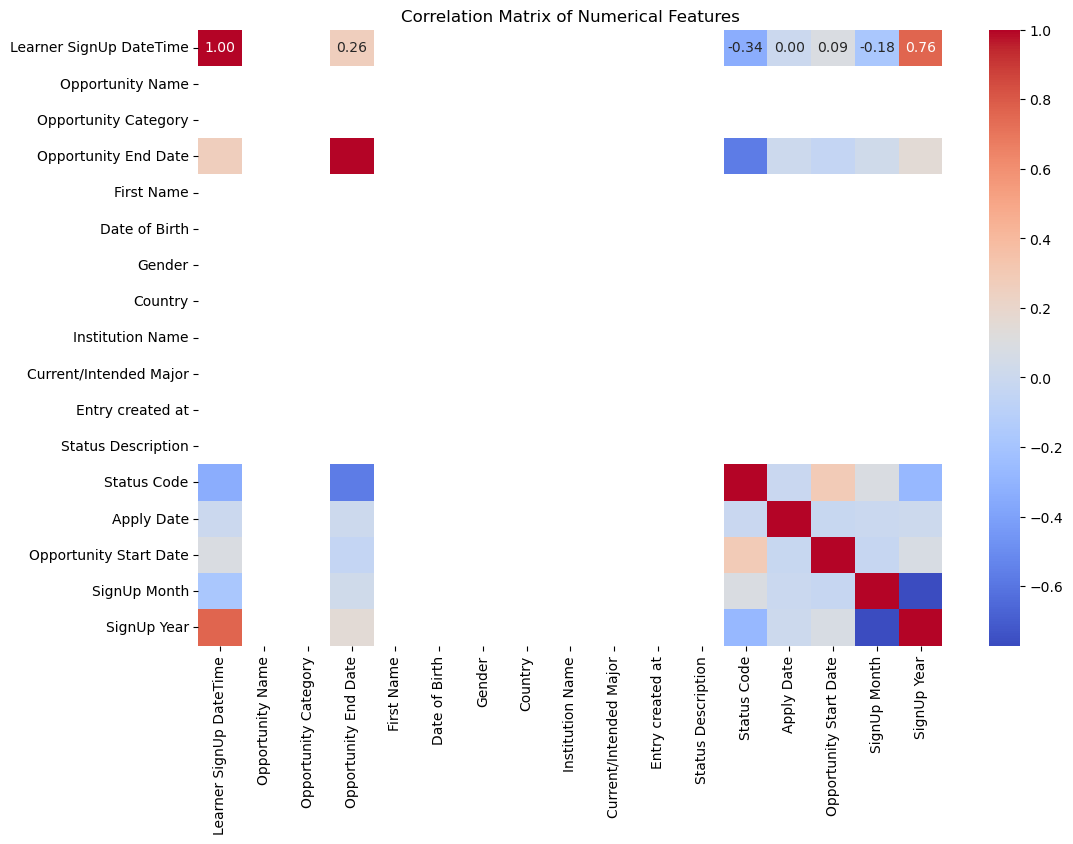

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()